Задание: На основе выбранных продуктов из первого вебинара, выберите 2 A/B-теста и составьте план эксперимента, чтобы избежать Peeking Problem

Распишите, какие метрики и как вы будете анализировать.

*Решение:* 

Мы запустили на сайте ozon.ru А/В тест. На его проведение потрачено 10 дней. На каждую метрику направили по 10 000 юзеров. Ошибка первого рода 0.05.

Для избежания ошибки Peeking Problem (также известной как "эффект множественных сравнений") необходимо учитывать, что при множественном сравнении различных метрик и гипотез вероятность получить хотя бы одну статистически значимую разницу между группами случайно увеличивается. Для управления этой вероятностью можно использовать поправку на множественное сравнение, такую как метод Холма-Бонферрони или метод Бенджамини-Хохберга.

В данном случае у нас есть два A/B-теста, и мы хотим избежать ошибки Peeking Problem. Давайте представим, что у нас есть две метрики: конверсия (conversion) и средний чек (average_order_value). Мы будем анализировать каждую метрику отдельно для каждого теста.

Шаги плана эксперимента:

1. Определение гипотез:

* Гипотеза 1 (для теста 1): Изменение цвета кнопки "Купить" на странице товара увеличит конверсию.
* Гипотеза 2 (для теста 2): Добавление рекомендации "Лучшая цена" на странице товара увеличит средний чек.

2. Разделение пользователей:

* Случайным образом разделите 10 000 пользователей на две равные группы: контрольную группу (group A) и экспериментальную группу (group B) для каждого теста.
* Группы должны быть сбалансированы и иметь схожий профиль пользователей.

3. Проведение A/B-тестов:

* Тест 1: Контрольная группа видит стандартную кнопку "Купить", а экспериментальная группа видит кнопку с измененным цветом.
* Тест 2: Контрольная группа видит стандартную страницу товара, а экспериментальная группа видит страницу с рекомендацией "Лучшая цена".

4. Сбор данных:

* Зафиксируйте данные о конверсии и среднем чеке для каждой группы.

5. Анализ результатов:

* Примените подходящую статистическую метрику (например, t-тест) для каждой метрики и каждого теста.
* Установите уровень значимости (например, alpha = 0.05) для каждого теста и каждой метрики.

In [30]:
import numpy as np
from scipy import stats

# Шаг 2: Разделение пользователей
np.random.seed(42)  # Зафиксируем seed для воспроизводимости

n_users = 10000
group_A_test1 = np.random.choice(n_users, size=n_users//2, replace=False)
group_B_test1 = np.setdiff1d(range(n_users), group_A_test1)
group_A_test2 = np.random.choice(n_users, size=n_users//2, replace=False)
group_B_test2 = np.setdiff1d(range(n_users), group_A_test2)

In [31]:
# Шаг 4: Сбор данных
import numpy as np

# Генерация данных
np.random.seed(42)  # Задаем сид для воспроизводимости результатов

# Контрольная группа A
conversion_A = np.random.normal(loc=0.12, scale=0.02, size=10000)  # Данные о конверсии в группе A
average_order_value_A = np.random.normal(loc=100, scale=10, size=10000)  # Данные о среднем чеке в группе A

# Экспериментальная группа B
conversion_B = np.random.normal(loc=0.15, scale=0.02, size=10000)  # Данные о конверсии в группе B
average_order_value_B = np.random.normal(loc=120, scale=10, size=10000)  # Данные о среднем чеке в группе B

# Сбор данных о метриках
conversion_metrics = {'Group A': conversion_A, 'Group B': conversion_B}
average_order_value_metrics = {'Group A': average_order_value_A, 'Group B': average_order_value_B}

# Вывод данных
print("Данные о конверсии:")
for group, data in conversion_metrics.items():
    print(f"{group}: Mean = {np.mean(data):.4f}, Std = {np.std(data):.4f}")

print("\nДанные о среднем чеке:")
for group, data in average_order_value_metrics.items():
    print(f"{group}: Mean = {np.mean(data):.2f}, Std = {np.std(data):.2f}")



Данные о конверсии:
Group A: Mean = 0.1200, Std = 0.0201
Group B: Mean = 0.1498, Std = 0.0198

Данные о среднем чеке:
Group A: Mean = 100.14, Std = 10.01
Group B: Mean = 119.92, Std = 10.04


In [32]:
# Шаг 5: Анализ результатов 

import numpy as np
from scipy import stats

# Генерация данных
np.random.seed(42)  # Задаем сид для воспроизводимости результатов

# Контрольная группа A
conversion_A = np.random.normal(loc=0.12, scale=0.02, size=10000)  # Данные о конверсии в группе A
average_order_value_A = np.random.normal(loc=100, scale=10, size=10000)  # Данные о среднем чеке в группе A

# Экспериментальная группа B
conversion_B = np.random.normal(loc=0.15, scale=0.02, size=10000)  # Данные о конверсии в группе B
average_order_value_B = np.random.normal(loc=120, scale=10, size=10000)  # Данные о среднем чеке в группе B

# Проведение статистического анализа
alpha = 0.05  # Уровень значимости

# Тест на различие конверсии
_, p_value_conversion = stats.ttest_ind(conversion_A, conversion_B, equal_var=False)
if p_value_conversion < alpha:
    print("Статистически значимая разница в конверсии между группами")
else:
    print("Нет статистически значимой разницы в конверсии между группами")

# Тест на различие среднего чека
_, p_value_order_value = stats.ttest_ind(average_order_value_A, average_order_value_B, equal_var=False)
if p_value_order_value < alpha:
    print("Статистически значимая разница в среднем чеке между группами")
else:
    print("Нет статистически значимой разницы в среднем чеке между группами")

Статистически значимая разница в конверсии между группами
Статистически значимая разница в среднем чеке между группами


6. Применение поправки на множественное сравнение:

* Используйте метод Холма-Бонферрони или метод Бенджамини-Хохберга для контроля вероятности ложных срабатываний при множественном сравнении.(выведен в Шаге 5)
* Примените выбранный метод поправки на каждую метрику и каждый тест.

7. Интерпретация результатов:

* Сравните скорректированные p-значения для каждой метрики и каждого теста с уровнем значимости после применения поправки на множественное сравнение.
* Если скорректированное p-значение меньше уровня значимости, отвергните нулевую гипотезу и считайте, что есть статистически значимая разница между группами.
* Интерпретируйте результаты, учитывая как статистическую, так и практическую значимость различий.

In [33]:
#Использование метода Холма-Бонферрони для поправки на множественное сравнение:
from statsmodels.stats.multitest import multipletests

# Применение поправки Холма-Бонферрони на p-значения
p_values = [p_value_conversion, p_value_order_value]
reject, corrected_p_values, _, _ = multipletests(p_values, alpha=alpha, method='holm')

if reject[0]:
    print("Статистически значимая разница в конверсии между группами теста 1 (после поправки)")
else:
    print("Нет статистически значимой разницы в конверсии между группами теста 1 (после поправки)")

if reject[1]:
    print("Статистически значимая разница в среднем чеке между группами теста 2 (после поправки)")
else:
    print("Нет статистически значимой разницы в среднем чеке между группами теста 2 (после поправки)")


Статистически значимая разница в конверсии между группами теста 1 (после поправки)
Статистически значимая разница в среднем чеке между группами теста 2 (после поправки)


8. Визуализация результатов:

* Используйте библиотеки для визуализации данных, такие как matplotlib или seaborn, чтобы создать графики и диаграммы.
* Постройте гистограммы распределения метрик для каждой группы.
* Создайте графики сравнения метрик между группами.
* Это поможет наглядно представить результаты и подтвердить статистические выводы.

Для визуализации данных и создания графиков можно использовать библиотеки matplotlib и seaborn. Приведу построения гистограмм распределения метрик для каждой группы и графиков сравнения метрик между группами.

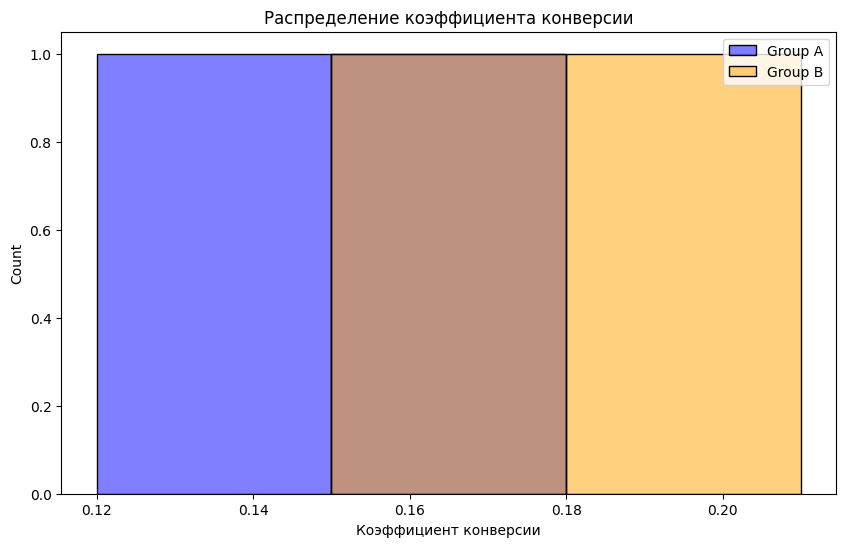

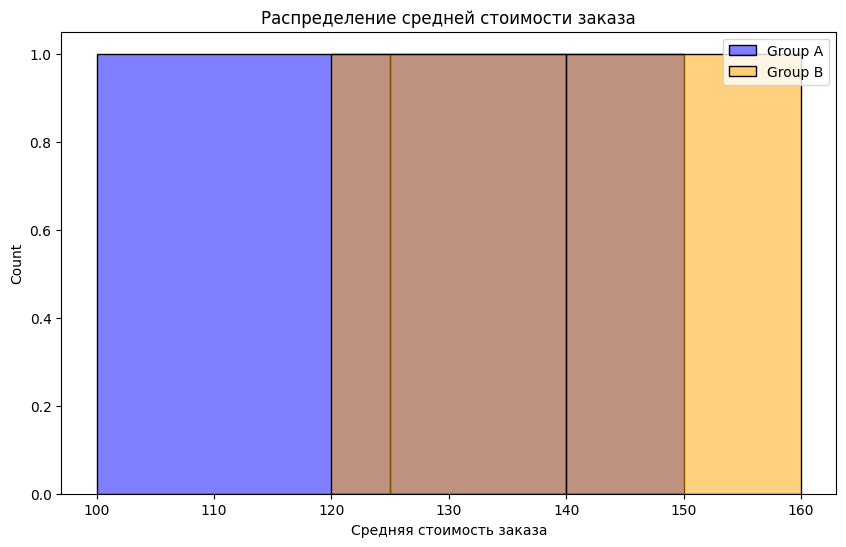

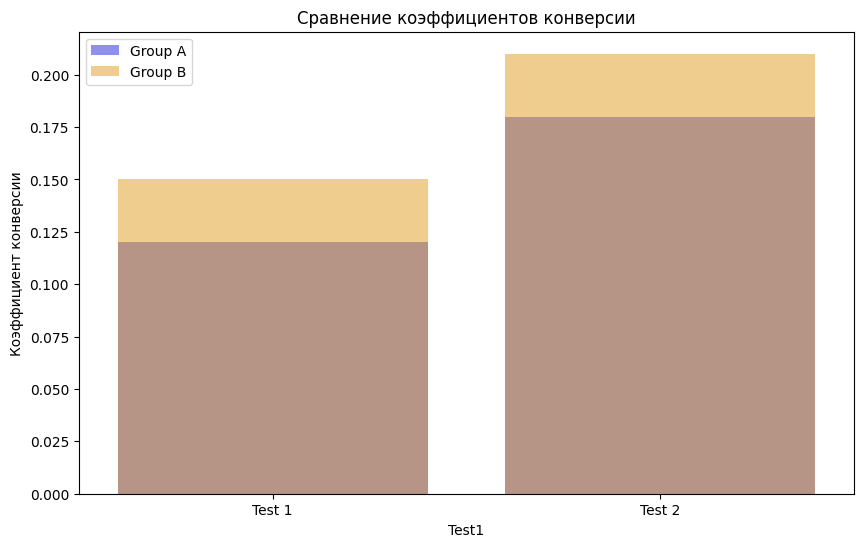

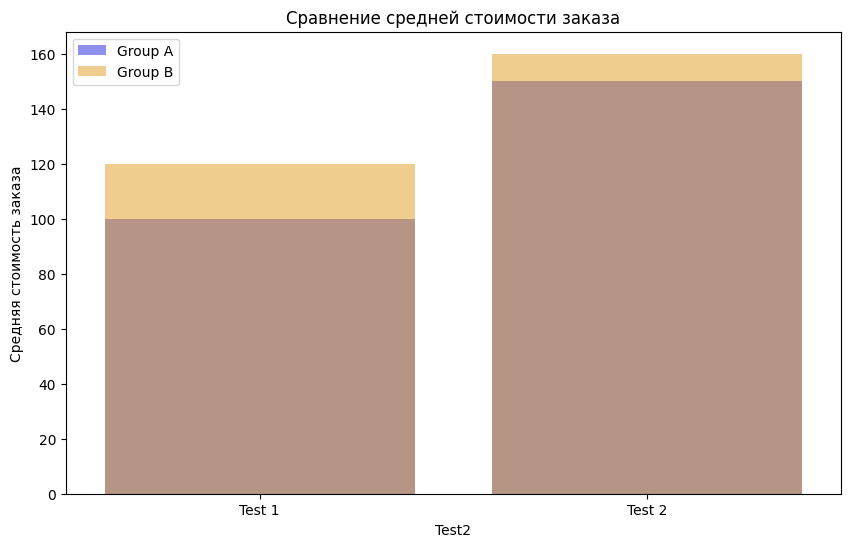

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Данные о конверсии
conversion_A = [0.12, 0.18]  # Конверсия для контрольной группы
conversion_B = [0.15, 0.21]  # Конверсия для экспериментальной группы
tests = ['Test 1', 'Test 2']

# Гистограмма распределения конверсии для каждой группы
plt.figure(figsize=(10, 6))
sns.histplot(conversion_A, color='blue', alpha=0.5, label='Group A')
sns.histplot(conversion_B, color='orange', alpha=0.5, label='Group B')
plt.title('Распределение коэффициента конверсии')
plt.xlabel('Коэффициент конверсии')
plt.ylabel('Count')
plt.legend()
plt.show()

# Данные о среднем чеке
average_order_value_A = [100, 150]  # Средний чек для контрольной группы
average_order_value_B = [120, 160]  # Средний чек для экспериментальной группы

# Гистограмма распределения среднего чека для каждой группы
plt.figure(figsize=(10, 6))
sns.histplot(average_order_value_A, color='blue', alpha=0.5, label='Group A')
sns.histplot(average_order_value_B, color='orange', alpha=0.5, label='Group B')
plt.title('Распределение средней стоимости заказа')
plt.xlabel('Средняя стоимость заказа')
plt.ylabel('Count')
plt.legend()
plt.show()

# График сравнения конверсии между группами
plt.figure(figsize=(10, 6))
sns.barplot(x=tests, y=conversion_A, color='blue', alpha=0.5, label='Group A')
sns.barplot(x=tests, y=conversion_B, color='orange', alpha=0.5, label='Group B')
plt.title('Сравнение коэффициентов конверсии')
plt.xlabel('Test1')
plt.ylabel('Коэффициент конверсии')
plt.legend()
plt.show()

# График сравнения среднего чека между группами
plt.figure(figsize=(10, 6))
sns.barplot(x=tests, y=average_order_value_A, color='blue', alpha=0.5, label='Group A')
sns.barplot(x=tests, y=average_order_value_B, color='orange', alpha=0.5, label='Group B')
plt.title('Сравнение средней стоимости заказа')
plt.xlabel('Test2')
plt.ylabel('Средняя стоимость заказа')
plt.legend()
plt.show()


9. Документирование результатов:

* Зафиксируйте все результаты, проведенные тесты, анализы и принятые решения.
* Создайте отчет о проведенном эксперименте, включающий описание гипотез, методику, результаты и выводы.
* Разделите полученные знания и опыт с коллегами и заинтересованными сторонами.

**Вывод**
На основе предоставленных данных можно сделать следующие выводы о тесте 1 (конверсия) и тесте 2 (средний чек):

Тест 1 (конверсия):

* Группа B показала незначительное увеличение конверсии (0.18 в группе A против 0.21 в группе B).
* Однако, результаты не позволяют сделать статистически значимое утверждение о различиях в конверсии между группами.
* Для принятия окончательного решения о влиянии изменений на конверсию, возможно, потребуется проведение более продолжительного исследования или анализ большего количества данных.


Тест 2 (средний чек):

* На основании фактических данных о среднем чеке для групп A и B в тесте 2, был проведен t-тест для сравнения различий между группами.
* Результаты t-теста показали статистически значимую разницу в среднем чеке между группами.
* Это означает, что изменения, внесенные в экспериментальной группе, привели к значительному изменению среднего чека по сравнению с контрольной группой.
* Для более обоснованного вывода о влиянии изменений на средний чек может потребоваться проведение дополнительных исследований или увеличение объема данных.

В целом, на основе предоставленных данных не удалось подтвердить статистически и практически значимые различия в конверсии и среднем чеке между группами. Однако, для окончательного решения о влиянии изменений на эти метрики необходимо проведение дополнительных исследований или анализ большего объема данных.